**Mounting Drive**

In [2]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


##**Libraries**

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from plotly.offline import iplot
from scipy import stats
from plotly.subplots import make_subplots
import plotly.graph_objs as go
from scipy.optimize import curve_fit
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

##**Load Data**

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Data Science Material/world_population.csv")
df.rename(columns={'Country/Territory':'Country'}, inplace = True)
df.columns

Index(['Rank', 'CCA3', 'Country', 'Capital', 'Continent', '2022 Population',
       '2020 Population', '2015 Population', '2010 Population',
       '2000 Population', '1990 Population', '1980 Population',
       '1970 Population', 'Area (km²)', 'Density (per km²)', 'Growth Rate',
       'World Population Percentage'],
      dtype='object')

#**Population EDA**

**General data analysis:**
* 234 pieces of data have 17 different feature.
* There is no missing values.
* Types of variables in our data: float64(3), int64(10), object(4)



In [5]:
#Size of data
print("Dimensions of Dataset: ",df.shape)

Dimensions of Dataset:  (234, 17)


**Summary Statistics**

In [6]:
df.drop(labels="Rank",axis=1).describe().T

count          mean           std       min  \
2022 Population              234.0  3.407441e+07  1.367664e+08  510.0000   
2020 Population              234.0  3.350107e+07  1.355899e+08  520.0000   
2015 Population              234.0  3.172996e+07  1.304050e+08  564.0000   
2010 Population              234.0  2.984524e+07  1.242185e+08  596.0000   
2000 Population              234.0  2.626947e+07  1.116982e+08  651.0000   
1990 Population              234.0  2.271022e+07  9.783217e+07  700.0000   
1980 Population              234.0  1.898462e+07  8.178519e+07  733.0000   
1970 Population              234.0  1.578691e+07  6.779509e+07  752.0000   
Area (km²)                   234.0  5.814494e+05  1.761841e+06    1.0000   
Density (per km²)            234.0  4.521270e+02  2.066122e+03    0.0261   
Growth Rate                  234.0  1.009577e+00  1.338498e-02    0.9120   
World Population Percentage  234.0  4.270513e-01  1.714977e+00    0.0000   

                                       25%           50%           75%  \
2022 Population              419738.500000  5.559944e+06  2.247650e+07   
2020 Population              415284.500000  5.493074e+06  2.144798e+07   
2015 Population              404676.000000  5.307400e+06  1.973085e+07   
2010 Population              393149.000000  4.942770e+06  1.915957e+07   
2000 Population              327242.000000  4.292907e+06  1.576230e+07   
1990 Population              264115.750000  3.825410e+06  1.186923e+07   
1980 Population              229614.250000  3.141146e+06  9.826054e+06   
1970 Population              155997.000000  2.604830e+06  8.817329e+06   
Area (km²)                     2650.000000  8.119950e+04  4.304258e+05   
Density (per km²)                38.417875  9.534675e+01  2.389332e+02   
Growth Rate                       1.001775  1.007900e+00  1.016950e+00   
World Population Percentage       0.010000  7.000000e-02  2.800000e-01   

                                      max  
2022 Population              1.425887e+09  
2020 Population              1.424930e+09  
2015 Population              1.393715e+09  
2010 Population              1.348191e+09  
2000 Population              1.264099e+09  
1990 Population              1.153704e+09  
1980 Population              9.823725e+08  
1970 Population              8.225344e+08  
Area (km²)                   1.709824e+07  
Density (per km²)            2.317227e+04  
Growth Rate                  1.069100e+00  
World Population Percentage  1.788000e+01

In [7]:
years = ['1970 Population',
         '1980 Population',
         '1990 Population',
         '2000 Population',
         '2010 Population',
         '2015 Population',
         '2020 Population',
         '2022 Population']
x_labels=['1970','1980','1990','2000','2010','2015','2020','2022']
# Set the figure size to match the poster dimensions (width=60, height=45)
plt.figure(figsize=(60, 45), dpi=300) # dpi is the resolution (dots per inch)
plt.bar(x_labels, df[years].sum(), color ='maroon', width = 0.5)
plt.xlabel("Years", fontsize=100, fontweight='bold')
plt.ylabel("Population", fontsize=100, fontweight='bold')
plt.title(" Populations over the Years", fontsize=120, fontweight='bold')
plt.xticks(fontsize=70, fontweight='bold')
plt.yticks(fontsize=70, fontweight='bold')
sns.despine()

# Make axis lines more visible by increasing linewidth
ax = plt.gca()
ax.spines['bottom'].set_linewidth(5)
ax.spines['left'].set_linewidth(5)
sns.despine()

# Save the image with a high resolution
plt.savefig("population_trend_bold_labels.png", dpi=300, bbox_inches='tight', pad_inches=0.2)
plt.show()

**Population of Top 10 Countries**

In [8]:
years = ['1970','1980','1990','2000','2010','2015','2020','2022']
while(1):
  inp = input("Enter Year: ")
  if inp in years:
    break
  else:
    print("Invalid Year!!!!")
    continue

Enter Year: 2022


**Population of each Continent in a Year**

In [10]:
Continent = df.groupby("Continent").agg({inp+" Population" : "sum"})
Continent.sort_values(by=inp+" Population",inplace=True,ascending=False)
Continent.reset_index(inplace=True)

print(Continent)

avg_GrowthRate = {
    "Asia": 1.05,
    "Africa": 2.58,
    "Europe": 0.01,
    "North America": 0.64,
    "South America": 0.72,
    "Oceania": 1.34
}

fig={"data":[{"x": Continent[inp+" Population"],
                    "y": Continent["Continent"],
                    "type":"bar",
                    "marker": dict(color='rgba(15,158, 125, 0.6)'),
                    "orientation":'h',
                    "text": [str(num) + "%" for num in avg_GrowthRate.values()],
                    "textposition": "auto"}],
            "layout":{"title":inp+" Population of each Continent in a Year"}}

iplot(fig)

       Continent  2022 Population
0           Asia       4721383274
1         Africa       1426730932
2         Europe        743147538
3  North America        600296136
4  South America        436816608
5        Oceania         45038554


**World Most/Least Country Top 10 in a Year**

In [11]:
World_country=df.sort_values(by=inp+" Population",inplace=False,ascending=False)


fig = make_subplots(rows=2,cols=1,subplot_titles=("World Most Populaus Country - "+inp+" Population", "World Least Populaus Country - "+inp+" Population"))

fig.add_trace(go.Bar(x=World_country.Country[:10],
                   y=World_country[inp+" Population"],
                   name="World Most Populaus Country Top 10 - "+inp+" Population",
                   text=World_country.Continent),
                  1,1)

fig.add_trace(go.Bar(x=World_country.Country.tail(10),
                   y=World_country[inp+" Population"].tail(10),
                   name="World Least Populaus Country Top 10 - "+inp+" Population",
                   text=World_country.Continent),
                  2,1)
fig.update_layout(title_text="World Most/Least Populaus Country Top 10 - "+inp+" Population")

iplot(fig)

Most/Least Country Top 5 of a specific Continent in a Year

In [12]:
continent = ["Asia","Europe","Africa","North America","South America","Oceania"]
while(1):
  cont = input("Enter Continent: ")
  if cont in continent:
    Asia_country=df[df["Continent"]==cont].sort_values(by=inp+" Population",inplace=False,ascending=False)

    fig = make_subplots(rows=1,cols=2,subplot_titles=(cont+" Most Populaus Country", cont+" Least Populaus Country"))

    fig.add_trace(go.Bar(x=Asia_country.Country[:5],
                      y=Asia_country[inp+" Population"],
                      name=cont+" Most Populaus Country"),
                      1,1)

    fig.add_trace(go.Bar(x=Asia_country.Country.tail(5),
                      y=Asia_country[inp+" Population"].tail(5),
                      name=cont+" Least Populaus Country"),
                      1,2)
    fig.update_layout(title_text=cont+" Most/Least Populaus Country Top 5 - "+inp+" Population")

    iplot(fig)
    break
  else:
    print("Invalid Continent!!!!")
    continue

Enter Continent: Asia


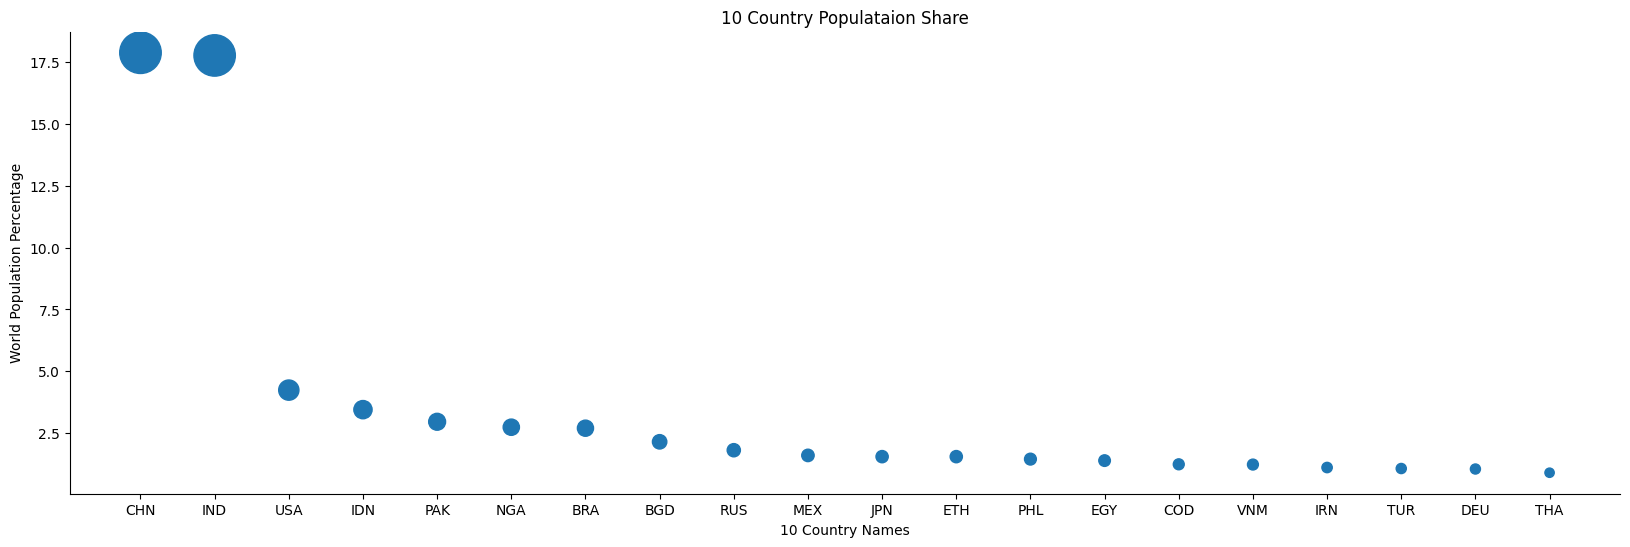

In [13]:
fig, ax = plt.subplots(figsize=(20, 6))
ax.scatter(df['CCA3'].head(20), df["World Population Percentage"].head(20), s=50*(df["World Population Percentage"].head(20)))

ax.set_title('10 Country Populataion Share')
ax.set_xlabel('10 Country Names')
ax.set_ylabel('World Population Percentage')

sns.despine()

#**Model Related**

**Specific Country population size over time**

In [14]:
# Remove missing values
df = df.dropna()

# Scale features


df = pd.melt(
    df,
    id_vars=('Rank', 'CCA3', 'Country', 'Capital', 'Continent', 'Area (km²)', 'Density (per km²)', 'Growth Rate',
       'World Population Percentage'),
    var_name='Year',
    value_name='Population'
)
df["Year"] = df["Year"].replace(to_replace=' Population', value="", regex=True)

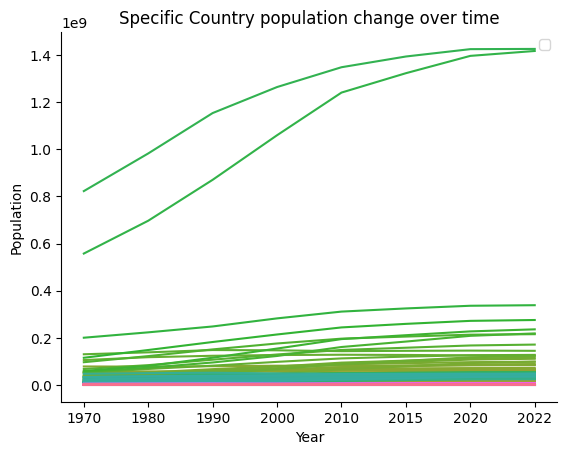

In [16]:
largest = df
largest = largest.sort_values('Year')

fig, ax = plt.subplots()
# largest.groupby('Country').plot('Year', 'Population', ax=ax)
sns.lineplot(x='Year', y='Population', hue='Country', data=largest, ax=ax)
plt.legend([], bbox_to_anchor=(1, 1))
plt.title("Specific Country population change over time")
plt.ylabel('Population')
sns.despine()

In [17]:
#Logarithm of the population
df['LogPopulation'] = np.log10(df['Population'])

**Malthusian/Exponential/Linear Growth Model**

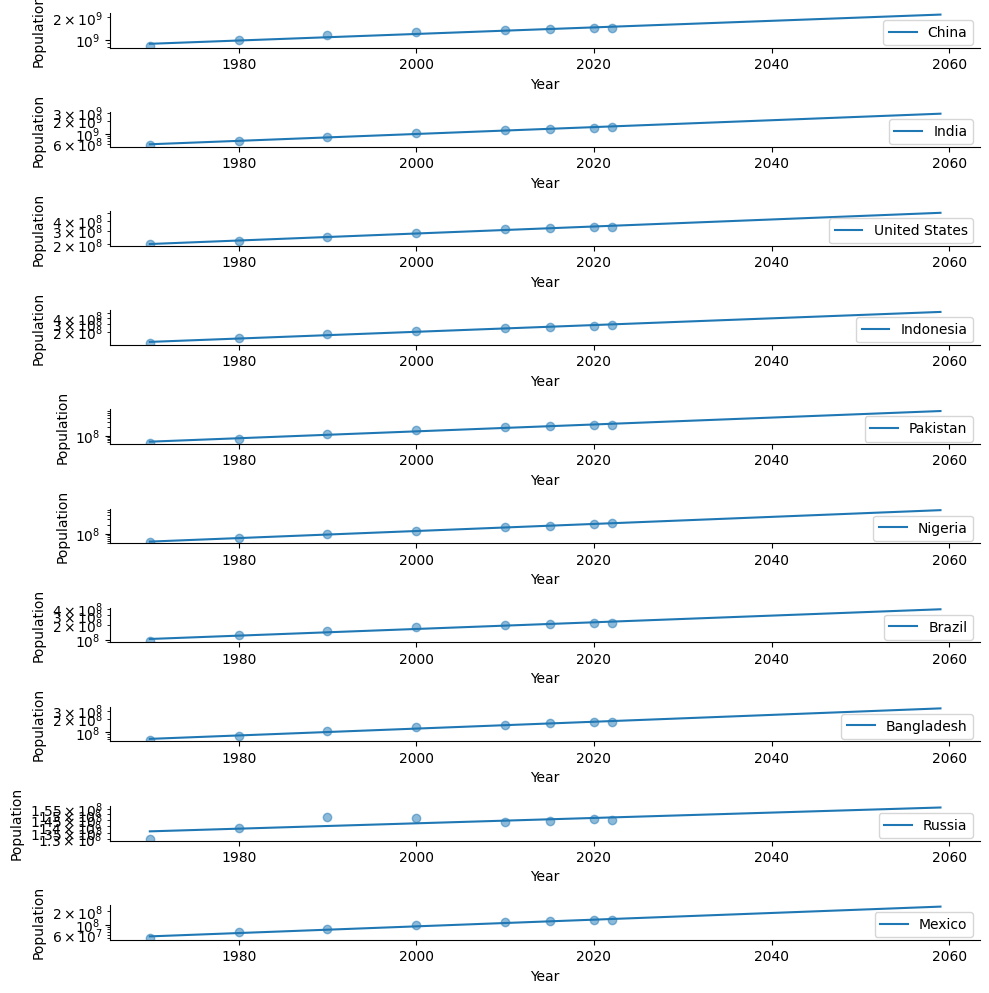

In [18]:
from sklearn import linear_model
df['Year'] = df['Year'].astype(int)

def extrapolate_plot(ax, df, country_name, max_year=2040):
    country_df = df[df['Country'] == country_name]
    x = country_df['Year'].values
    y = country_df['Population'].values
    logy = country_df['LogPopulation'].values
    handles = ax.plot(x, y, 'o', alpha=0.5)

    years = np.arange(x.min(), max_year)
    lm = linear_model.LinearRegression()
    lm.fit(x.reshape((-1, 1)), logy)
    logpopulation = lm.predict(years.reshape(-1, 1))
    ax.plot(years, 10**logpopulation, label=country_name, color=handles[0].get_color())
    ax.set_xlabel('Year')
    ax.set_ylabel('Population')
    ax.set_yscale('log')

# inp1 = input("Country 1: ")
# inp2 = input("Country 2: ")
largest_countries = df["Country"].head(10)

fig, axs = plt.subplots(10, 1, figsize=(10, 10))
# fig, axs = plt.subplots(len(df["Country"].unique()), 1, figsize=(10, 10))

for ax, country_name in zip(axs, largest_countries):
    extrapolate_plot(ax, df, country_name, max_year=2060)
    ax.legend()

sns.despine()
plt.tight_layout()
plt.show()

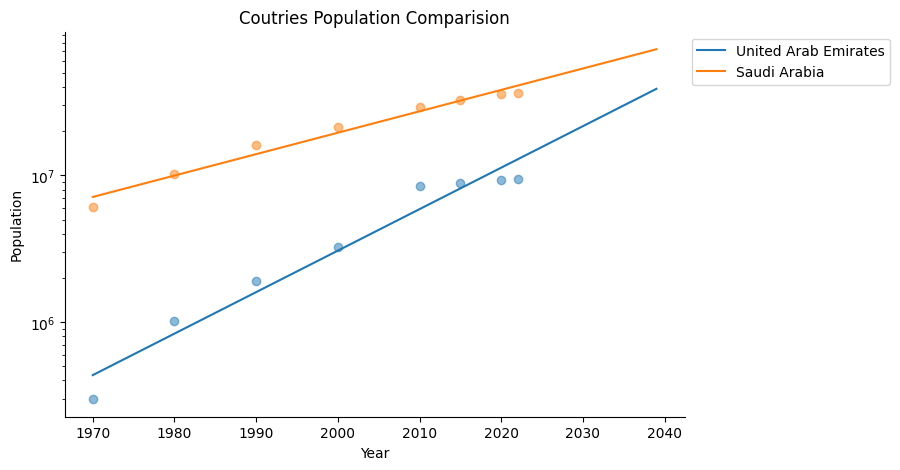

In [20]:
#For choice
from sklearn import linear_model
df['Year'] = df['Year'].astype(int)
def extrapolate_plot(df, country_name, max_year=2040):
    country_df = df[df['Country'] == country_name]
    x = country_df['Year'].values
    y = country_df['Population'].values
    logy = country_df['LogPopulation'].values
    handles = plt.plot(x, y, 'o', alpha=0.5)

    years = np.arange(x.min(), max_year)
    lm = linear_model.LinearRegression()
    lm.fit(x.reshape((-1, 1)), logy)
    logpopulation = lm.predict(years.reshape(-1, 1))
    plt.plot(years, 10**logpopulation, label=country_name, color=handles[0].get_color())
    plt.xlabel('Year')
    plt.ylabel('Population')
    plt.yscale('log')

# inp1 = input("Country 1: ")
# inp2 = input("Country 2: ")
# inp3 = input("Country 3: ")
# inp4 = input("Country 4: ")
# inp5 = input("Country 5: ")
# largest_countries = (inp1,inp2,inp3,inp4,inp5)
# largest_countries = ("United States","China")
# largest_countries = ("China","India")
# largest_countries = ("Pakistan","India")
largest_countries = ("United Arab Emirates","Saudi Arabia")
# largest_countries = ("North Korea","South Korea")

plt.figure(figsize=(8, 5))

for country_name in largest_countries:
    extrapolate_plot(df, country_name, max_year=2040)

plt.title("Coutries Population Comparision")
plt.legend(bbox_to_anchor=(1, 1))

sns.despine()

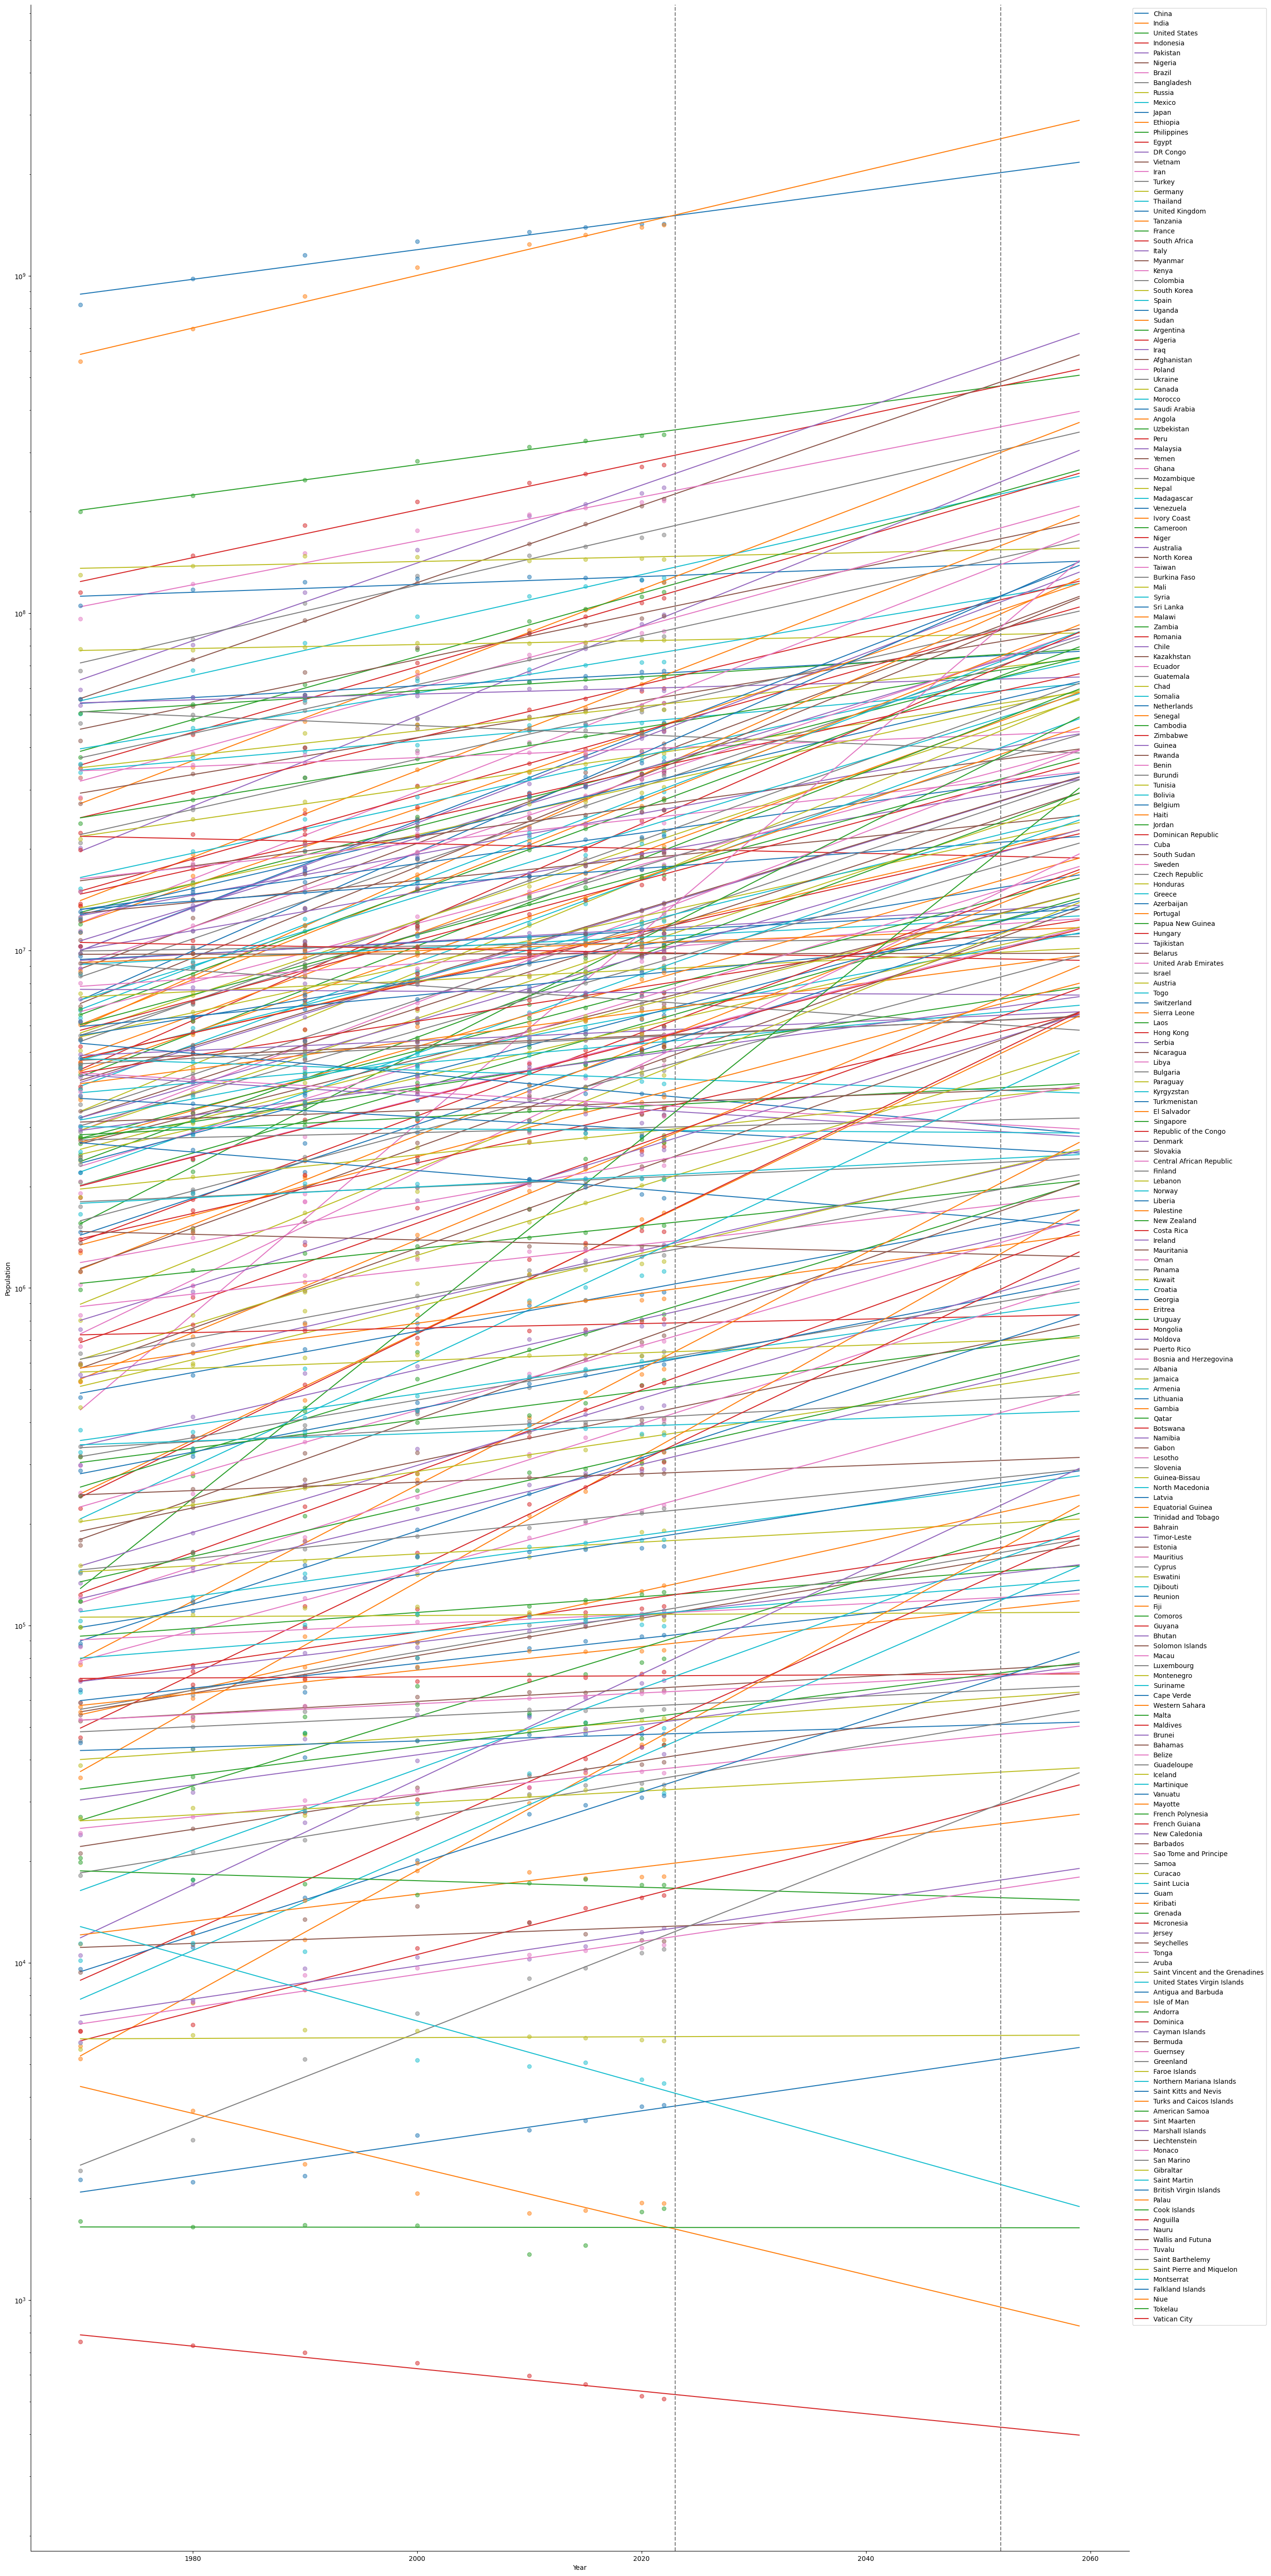

In [21]:
#For All
from sklearn import linear_model
df['Year'] = df['Year'].astype(int)
def extrapolate_plot(df, country_name, max_year=2040):
    country_df = df[df['Country'] == country_name]
    x = country_df['Year'].values
    y = country_df['Population'].values
    logy = country_df['LogPopulation'].values
    handles = plt.plot(x, y, 'o', alpha=0.5)

    years = np.arange(x.min(), max_year)
    lm = linear_model.LinearRegression()
    lm.fit(x.reshape((-1, 1)), logy)
    logpopulation = lm.predict(years.reshape(-1, 1))
    plt.plot(years, 10**logpopulation, label=country_name, color=handles[0].get_color())
    plt.xlabel('Year')
    plt.ylabel('Population')
    plt.yscale('log')

largest_countries = df["Country"].unique()
# largest_countries = ('India', 'China', 'United States', 'Indonesia')

plt.figure(figsize=(30, 70))

for country_name in largest_countries:
    extrapolate_plot(df, country_name, max_year=2060)

plt.legend(bbox_to_anchor=(1, 1))

plt.axvline(x=2023, color='gray',  linestyle='--')
plt.axvline(x=2052, color='gray',  linestyle='--')
sns.despine()